<img src='img_notebook/acc.png' width = 300>

### ACCENTURE VIRTUAL INTERNSHIP PROGRAM-TASK 2

The brief carefully it states that the client wanted to see  
**“An analysis of their content categories showing the top 5 categories with the largest popularity”.**

As explained in the data model, popularity is quantified by the “Score” given to each reaction type.
We therefore need data showing the content ID, category, content type, reaction type, and reaction score.
So, to figure out popularity, we’ll have to add up which content categories have the largest score.

#### Clean the data by:
- removing rows that have values which are missing,
- changing the data type of some values within a column, and
- removing columns which are not relevant to this task.

*Think about how each column might be relevant to the business question you’re investigating. 
If you can’t think of why a column may be useful, it may not be worth including it.*

1. Create a final data set by merging your three tables together
2. Figure out the Top 5 performing categories
3. Add up the total scores for each category.

The end result should be one spreadsheet which contains:
A cleaned dataset
The top 5 categories


### *DATA PREPARATION*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
df_content= pd.read_csv('csv/content.csv',index_col=[0])
df_react = pd.read_csv('csv/reactions.csv',index_col=[0])
df_rtype = pd.read_csv('csv/reactions_type.csv',index_col=[0])

In [3]:
df_content.head(3)

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...


In [4]:
df_react.head(3)

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51


In [5]:
df_rtype.head(3)

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0


## Detailed about **Reactions Type**

In [6]:
df_rtype.head(3)

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0


In [7]:
df_rtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [8]:
df_rtype.shape

(16, 3)

In [9]:
df_rtype.isnull().any()

Type         False
Sentiment    False
Score        False
dtype: bool

In [10]:
df_rtype.duplicated().any()

False

In [11]:
df_rtype.describe(include=["object"])

,Type,Sentiment
count,16,16
unique,16,3
top,heart,positive
freq,1,9


In [12]:
df_rtype.value_counts()

Type         Sentiment  Score
adore        positive   72       1
cherish      positive   70       1
disgust      negative   0        1
dislike      negative   10       1
hate         negative   5        1
heart        positive   60       1
indifferent  neutral    20       1
interested   positive   30       1
intrigued    positive   45       1
like         positive   50       1
love         positive   65       1
peeking      neutral    35       1
scared       negative   15       1
super love   positive   75       1
want         positive   70       1
worried      negative   12       1
dtype: int64

In [13]:
df_rtype['Type'].value_counts()

heart          1
want           1
disgust        1
hate           1
interested     1
indifferent    1
love           1
super love     1
cherish        1
adore          1
like           1
dislike        1
intrigued      1
peeking        1
scared         1
worried        1
Name: Type, dtype: int64

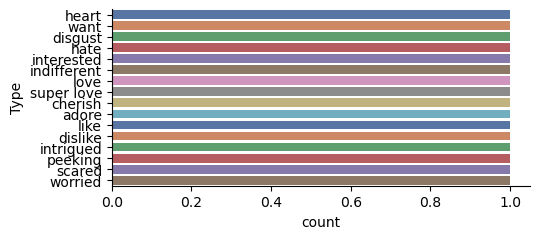

In [14]:
sns.catplot(y='Type', kind='count', data=df_rtype, height=2.5, aspect=2.2, palette = 'deep')

In [15]:
df_rtype['Score'].value_counts()

70    2
60    1
0     1
5     1
30    1
20    1
65    1
75    1
72    1
50    1
10    1
45    1
35    1
15    1
12    1
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='Density'>

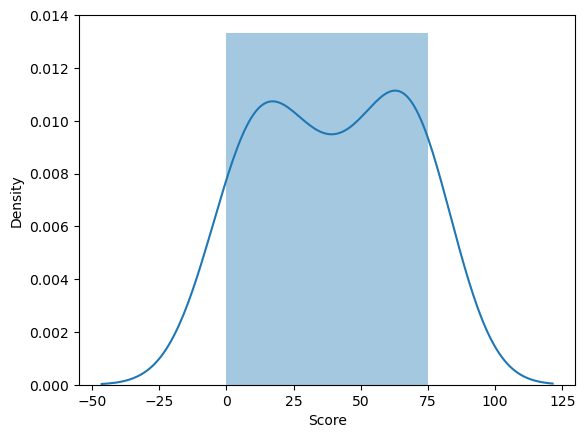

In [16]:
sns.distplot(df_rtype['Score'])

In [17]:
df_rtype['Sentiment'].value_counts()

positive    9
negative    5
neutral     2
Name: Sentiment, dtype: int64

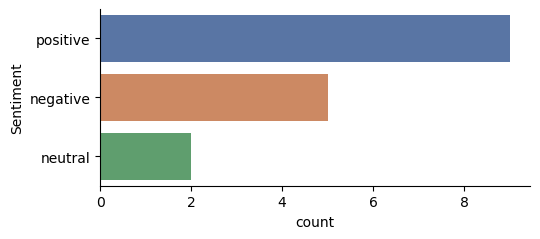

In [18]:
sns.catplot(y='Sentiment', kind='count', data=df_rtype, height=2.5, aspect=2.2, palette = 'deep')

#### more detail about *sentiment*

In [19]:
#find the neutral sentiment
df_rtype[df_rtype['Sentiment']== "neutral"]

,Type,Sentiment,Score
5,indifferent,neutral,20
13,peeking,neutral,35


In [20]:
#find the negative sentiment
df_rtype[df_rtype['Sentiment']== "negative"]

,Type,Sentiment,Score
2,disgust,negative,0
3,hate,negative,5
11,dislike,negative,10
14,scared,negative,15
15,worried,negative,12


In [21]:
#find the positive sentiment
df_rtype[df_rtype['Sentiment']== "positive"]

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
4,interested,positive,30
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72
10,like,positive,50
12,intrigued,positive,45


### summary about reactions type
- have **3 columns and 16 rows**
- have 3 type columns = **type, sentiment, score**
- no data duplicates
- no data null
- have **16** values **type**
- have **3** values of **sentiment**
- have range from **0-75** of **score**
- 9 sentiment **positive**
- 2 sentimen **neutral**
- 5 sentiment **negative**
- the top is type of **heart** and top for sentiment is **positive**

## Detailed about **content**

In [22]:
df_content.head(3)

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...


In [23]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
 4   URL         801 non-null    object
dtypes: object(5)
memory usage: 46.9+ KB


In [24]:
df_content.shape

(1000, 5)

In [25]:
df_content.columns

Index(['Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [26]:
df_content.describe(include=["object"])

,Content ID,User ID,Type,Category,URL
count,1000,1000,1000,1000,801
unique,1000,446,4,41,801
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,72d2587e-8fae-4626-a73d-352e6465ba0f,photo,technology,https://socialbuzz.cdn.com/content/storage/975...
freq,1,8,261,71,1


### check the duplicates

In [27]:
df_content.duplicated().any()

False

In [28]:
df_content['User ID'].duplicated().any()

True

In [29]:
df_content['Content ID'].duplicated().any()

False

In [30]:
df_content['URL'].duplicated().any()

True

In [31]:
df_content.isnull().any()

Content ID    False
User ID       False
Type          False
Category      False
URL            True
dtype: bool

In [32]:
df_content['Content ID'].isnull().any()

False

In [33]:
df_content['User ID'].value_counts()

72d2587e-8fae-4626-a73d-352e6465ba0f    8
3956593b-7739-426a-b7a5-e841c95a5df9    7
b473e898-b7b0-4a57-959d-484bf4cc4483    7
47def058-01cc-478f-9830-eaddcccac633    6
13f0db8a-152a-496f-a6e8-1ed6a90b8788    6
                                       ..
49f49bcf-17fe-4edd-990d-16c3d1df931b    1
b76ebf8d-3f04-4e7f-aec8-22575f68d9e2    1
6978b891-dea2-4217-8bc8-47d5aa25e743    1
9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4    1
fb4654ff-ce23-4a77-b52a-50f8948b5664    1
Name: User ID, Length: 446, dtype: int64

### drop column user ID and content ID

In [34]:
df_cn = df_content.drop(columns=['User ID', 'URL'], inplace=False)

In [35]:
df_cn.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


**detailed column type**

In [36]:
df_cn['Type'].value_counts()

photo    261
video    259
GIF      244
audio    236
Name: Type, dtype: int64

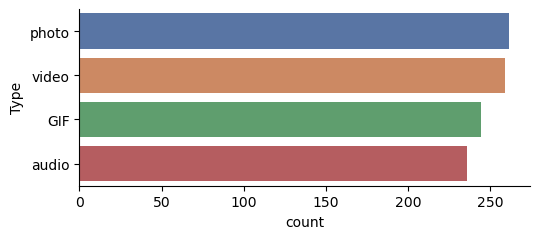

In [37]:
sns.catplot(y='Type', kind='count', data=df_cn, height=2.5, aspect=2.2, palette = 'deep')

**detailed column category**

In [38]:
df_cn['Category'].value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

In [39]:
df_cn['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

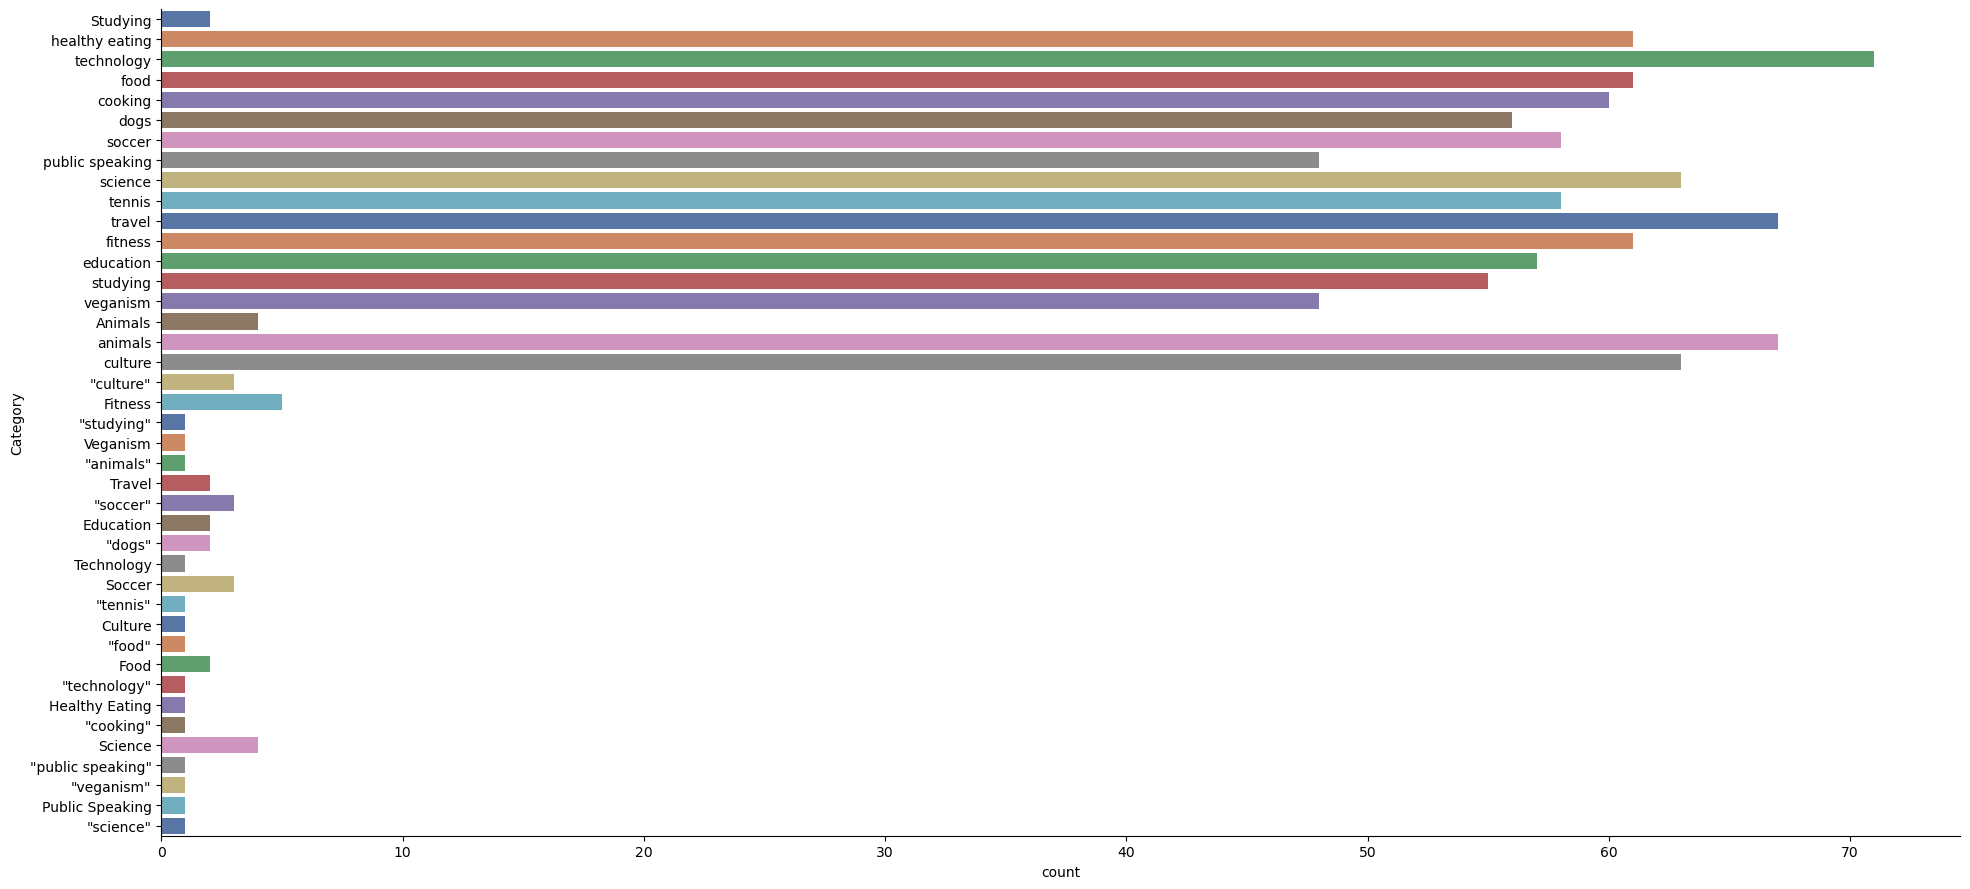

In [40]:
sns.catplot(y='Category', kind='count', data=df_cn, height=9.0, aspect=2.2, palette = 'deep')

as we can see, stiil many of category data with duplicate names.

In [41]:
df_cn['Category'] = df_cn['Category'].str.replace("'", "").str.replace('"', '')

In [42]:
df_cn['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', 'Fitness', 'Veganism', 'Travel', 'Education',
       'Technology', 'Soccer', 'Culture', 'Food', 'Healthy Eating',
       'Science', 'Public Speaking'], dtype=object)

In [43]:
#mengecilkan semua huruf
df_cn['Category'] = df_cn['Category'].str.lower()

In [44]:
df_cn['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [45]:
df_cn['Category'].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

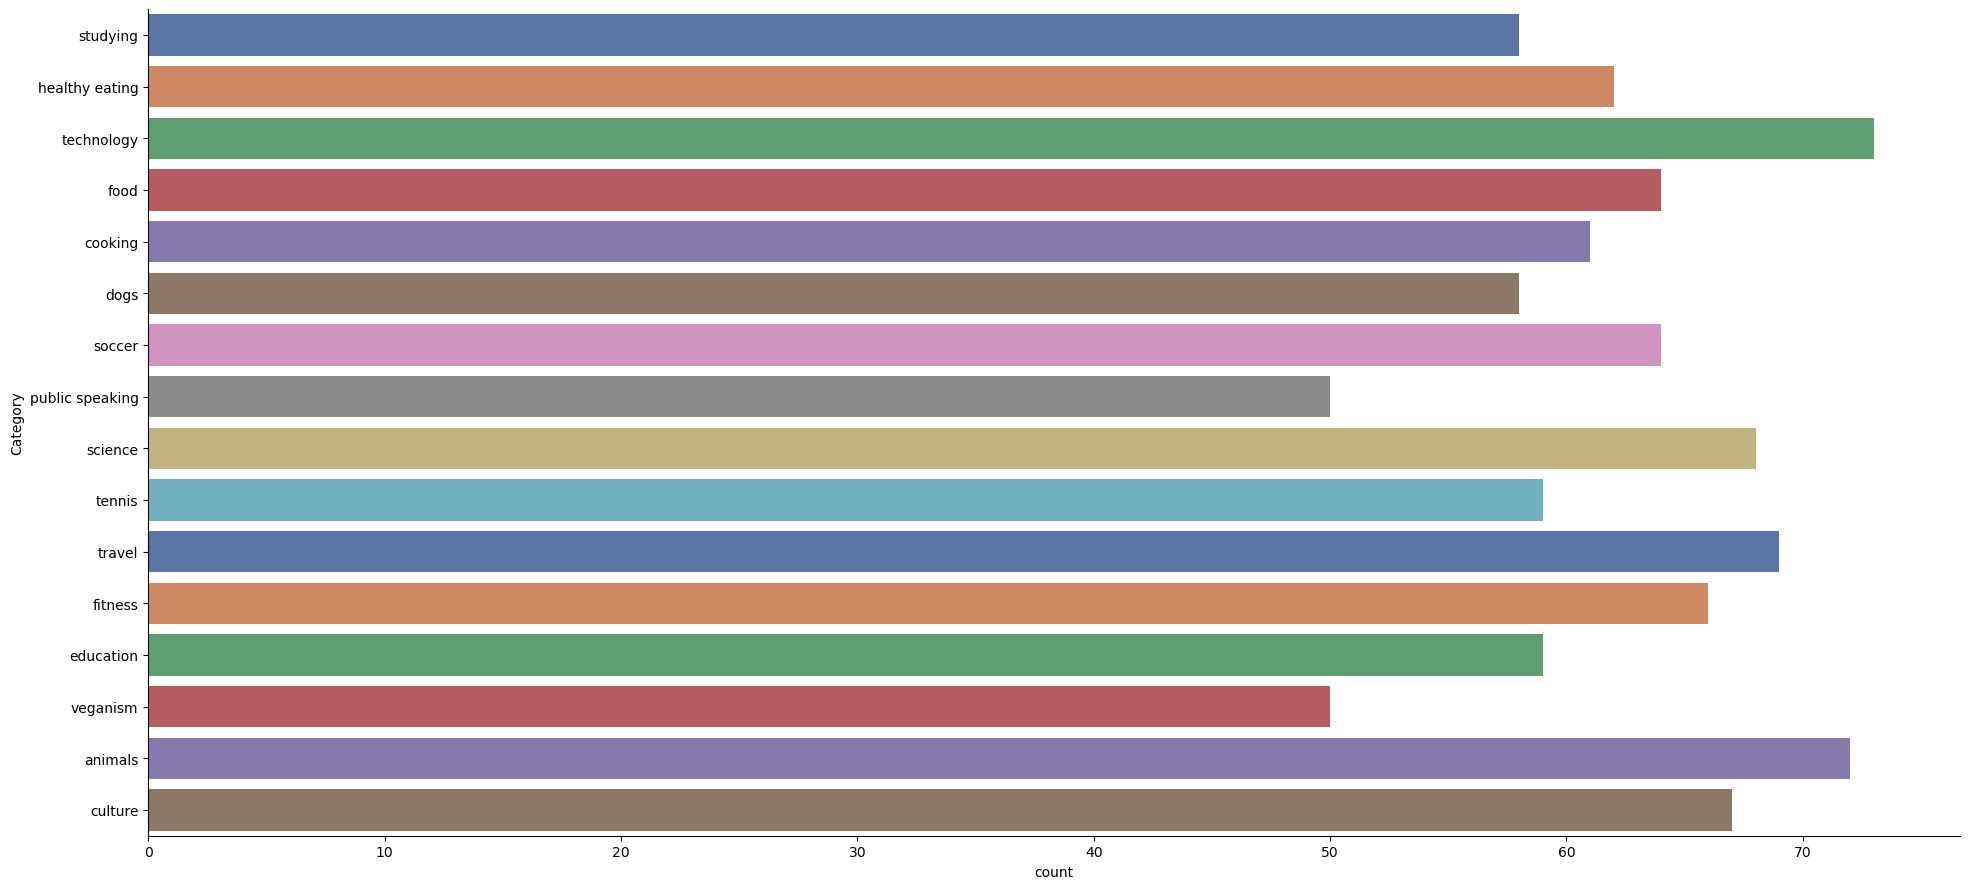

In [46]:
sns.catplot(y='Category', kind='count', data=df_cn, height=9.0, aspect=2.2, palette = 'deep')

In [47]:
df_cn.columns

Index(['Content ID', 'Type', 'Category'], dtype='object')

In [48]:
df_cn = df_cn.rename(columns={'Type': 'ContentType', 'Category': 'ContentCategory'})
print(df_cn)

                               Content ID ContentType  ContentCategory
0    97522e57-d9ab-4bd6-97bf-c24d952602d2       photo         studying
1    9f737e0a-3cdd-4d29-9d24-753f4e3be810       photo   healthy eating
2    230c4e4d-70c3-461d-b42c-ec09396efb3f       photo   healthy eating
3    356fff80-da4d-4785-9f43-bc1261031dc6       photo       technology
4    01ab84dd-6364-4236-abbb-3f237db77180       video             food
..                                    ...         ...              ...
995  b4cef9ef-627b-41d7-a051-5961b0204ebb       video  public speaking
996  7a79f4e4-3b7d-44dc-bdef-bc990740252c         GIF       technology
997  435007a5-6261-4d8b-b0a4-55fdc189754b       audio         veganism
998  4e4c9690-c013-4ee7-9e66-943d8cbd27b7         GIF          culture
999  75d6b589-7fae-4a6d-b0d0-752845150e56       audio       technology

[1000 rows x 3 columns]


### summary about content
- have **5 columns and 1000 rows**
- have 4 type columns = **content_id, user_id, type, category, url**
- ther is data duplicated at = **user_id, type, categoy and url**
- there is data null at columns **url**
- *my approach* = **delete column user id, and URL**
- *top type content* =  **photo and video**
- *top type category* = **technology, animals, travel**
- *feature engineering* = **remove the quotation marks, replace all letters with lowercase letters**
- *result for category* = at first the column is **41** and for rn **after feature engineering** the columns is **16**
- rename column type become type content

## Detailed about **Reactions**

In [49]:
df_react.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [50]:
df_react.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   User ID     22534 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: object(4)
memory usage: 998.2+ KB


In [51]:
df_react.shape

(25553, 4)

In [52]:
#drop user_id 
df_react = df_react.drop(columns=['User ID'], inplace=False)

In [53]:
df_react.head()

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [54]:
df_react['Type'].unique()

array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

In [55]:
df_react['Type'].isnull().any()

True

In [56]:
nan_counts = df_react['Type'].isna().sum()
total_rows = len(df_react)

In [57]:
nan_percentages = (nan_counts / total_rows) * 100
nan_percentages

3.835166125308183

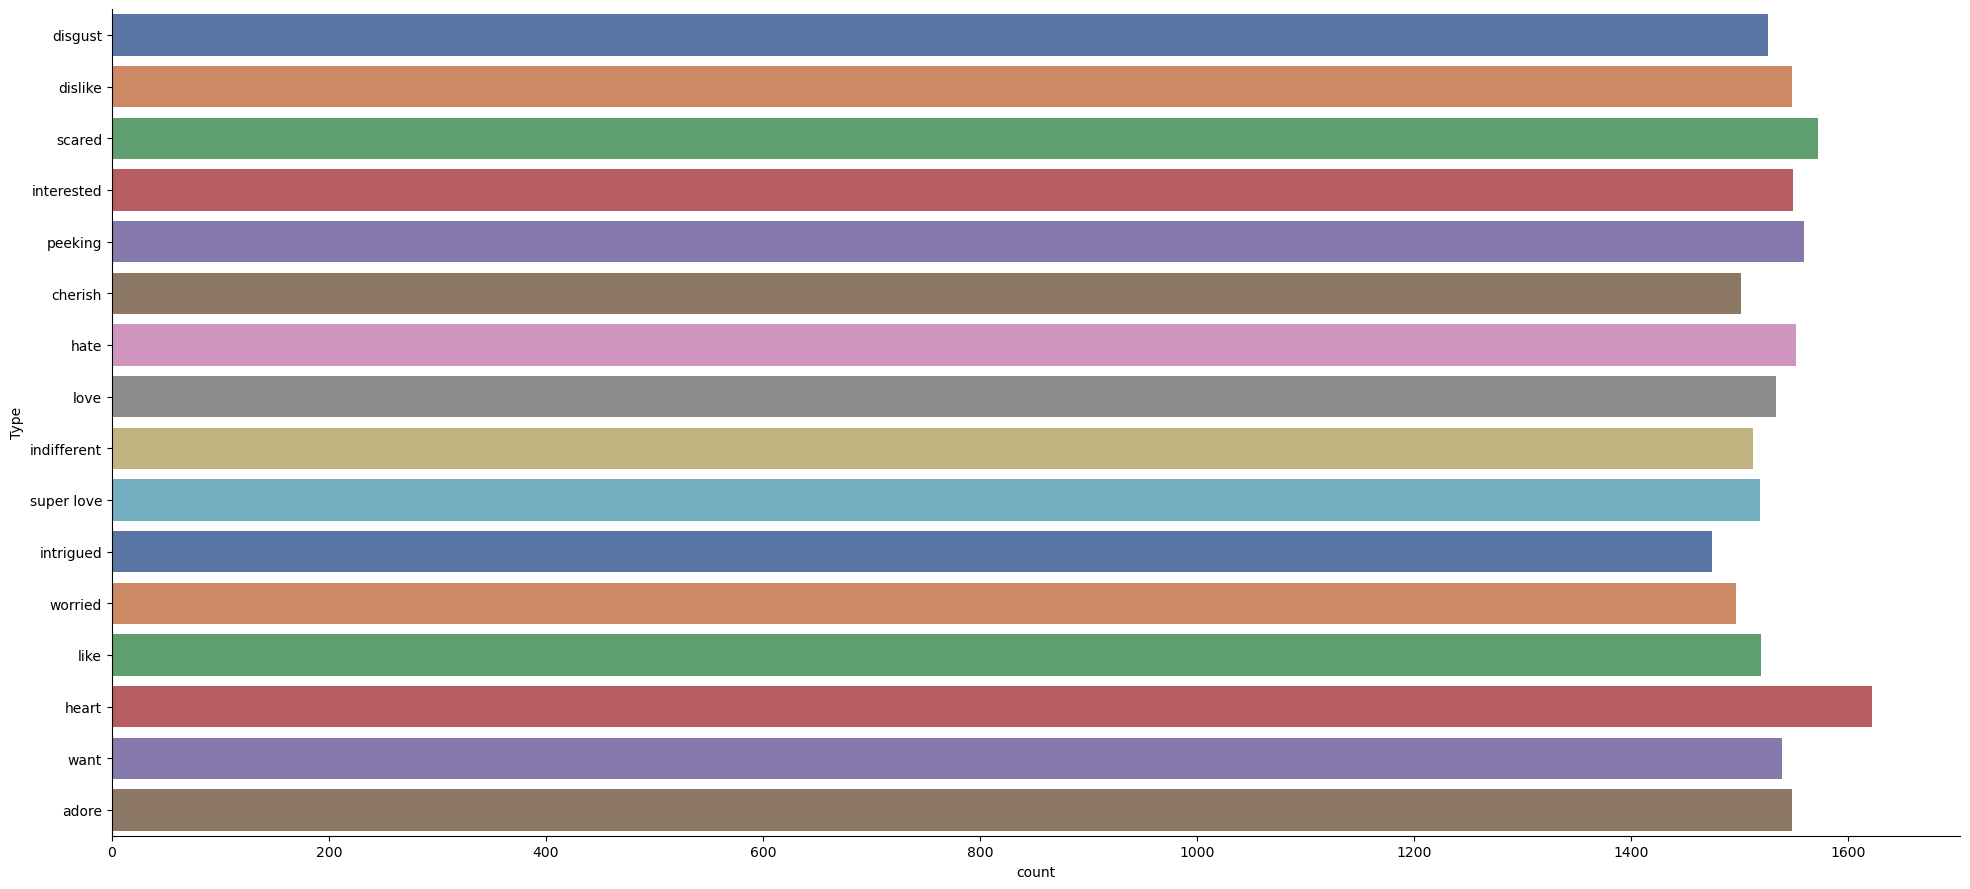

In [58]:
sns.catplot(y='Type', kind='count', data=df_react, height=9.0, aspect=2.2, palette = 'deep')

In [59]:
dfr_clean = df_react.dropna()

In [60]:
dfr_clean.head(3)

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58


In [61]:
dfr_clean.info(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    24573 non-null  object
dtypes: object(3)
memory usage: 767.9+ KB


In [62]:
dfr_clean.isna().sum()

Content ID    0
Type          0
Datetime      0
dtype: int64

as we can see, the data who have NaN is 0 in each columns

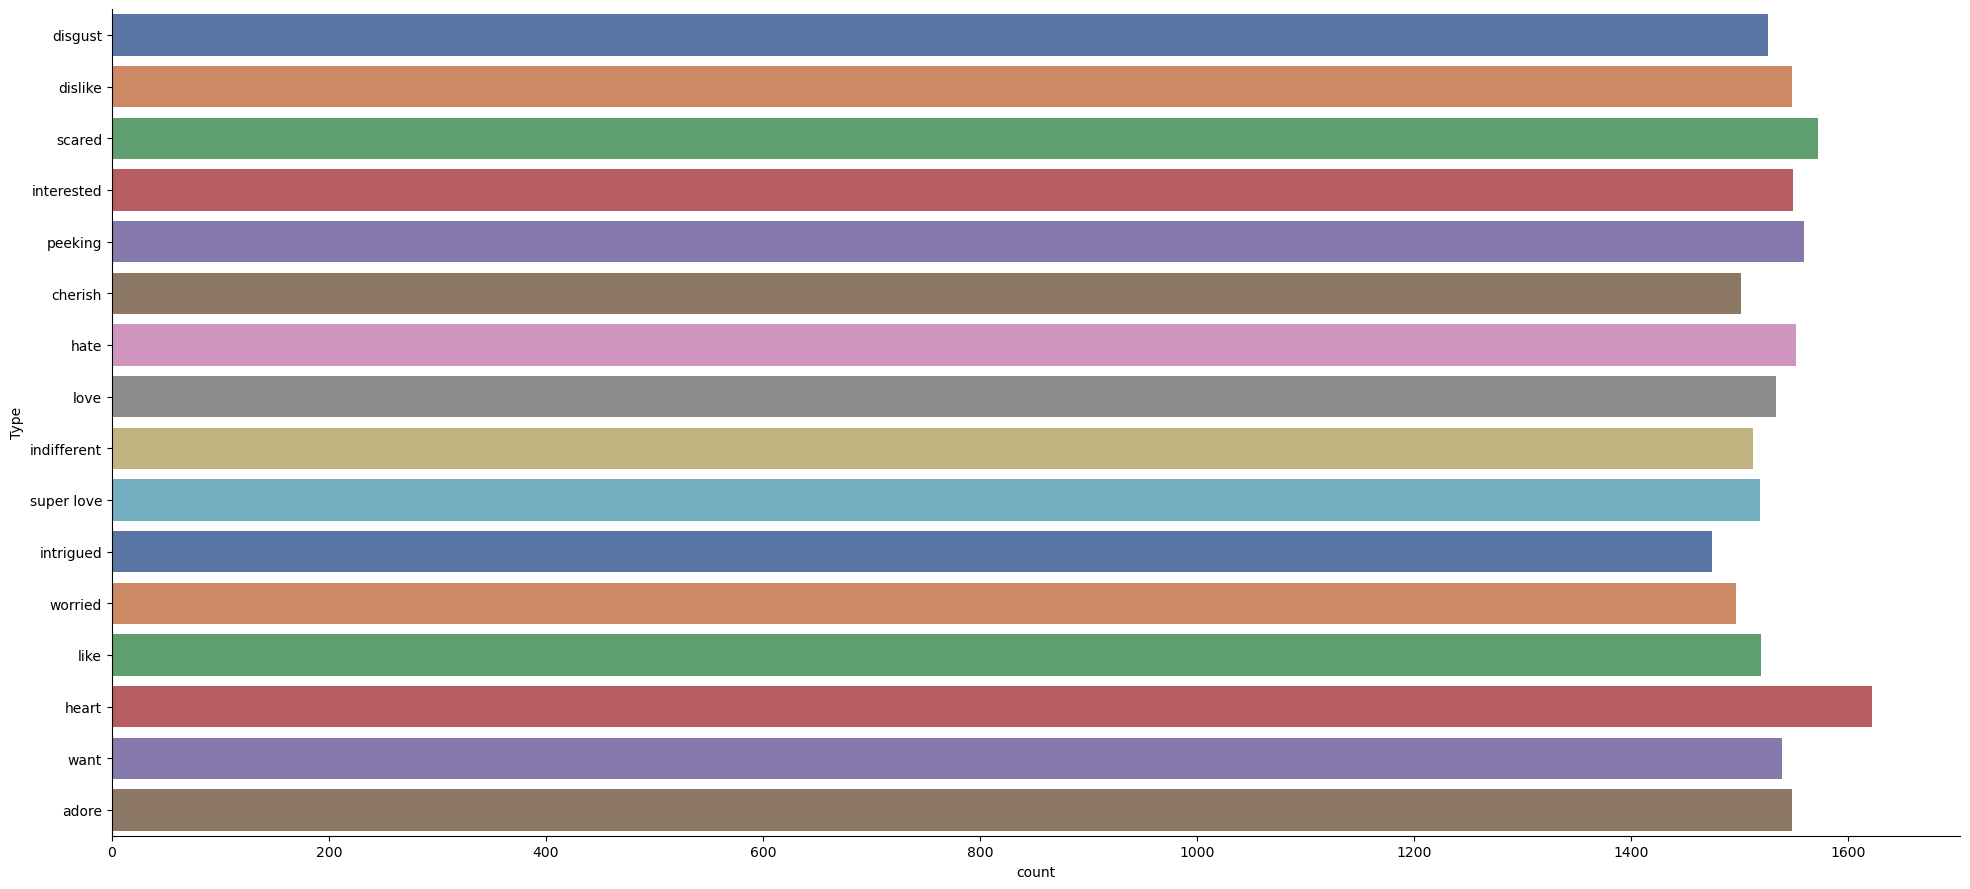

In [63]:
sns.catplot(y='Type', kind='count', data=dfr_clean, height=9.0, aspect=2.2, palette = 'deep')

In [64]:
dfr_clean.columns

Index(['Content ID', 'Type', 'Datetime'], dtype='object')

In [66]:
dfr_clean = dfr_clean.rename(columns={'Type': 'ReactType'})
print(dfr_clean)

                                 Content ID   ReactType             Datetime
1      97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust  2020-11-07 09:43:50
2      97522e57-d9ab-4bd6-97bf-c24d952602d2     dislike  2021-06-17 12:22:51
3      97522e57-d9ab-4bd6-97bf-c24d952602d2      scared  2021-04-18 05:13:58
4      97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust  2021-01-06 19:13:01
5      97522e57-d9ab-4bd6-97bf-c24d952602d2  interested  2020-08-23 12:25:58
...                                     ...         ...                  ...
25548  75d6b589-7fae-4a6d-b0d0-752845150e56     dislike  2020-06-27 09:46:48
25549  75d6b589-7fae-4a6d-b0d0-752845150e56   intrigued  2021-02-16 17:17:02
25550  75d6b589-7fae-4a6d-b0d0-752845150e56  interested  2020-09-12 03:54:58
25551  75d6b589-7fae-4a6d-b0d0-752845150e56     worried  2020-11-04 20:08:31
25552  75d6b589-7fae-4a6d-b0d0-752845150e56     cherish  2021-01-04 04:55:11

[24573 rows x 3 columns]


### summary about content
- have **4 columns and 25553 rows**
- have 3 type columns = **content_id, user_id, type, category**
- there is data null at columns **type**
- *my approach* = **delete column user id, and content id**
- at type have 980 data null and i decide to delete the missing value because have **3,8%**

### merge dataframe

In [68]:
merged_df = pd.merge(df_cn, dfr_clean, on='Content ID', how='inner')

In [69]:
merged_df.head()

,Content ID,ContentType,ContentCategory,ReactType,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58


In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Content ID       24573 non-null  object
 1   ContentType      24573 non-null  object
 2   ContentCategory  24573 non-null  object
 3   ReactType        24573 non-null  object
 4   Datetime         24573 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


jika kita lihat type di reaction type memiliki nilai yg sama jadi kita hubungkan anatar mergeddf dengan reactionstype

In [72]:
df_rtype.head(3)

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0


let's rename the type

In [74]:
df_rtype = df_rtype.rename(columns={'Type': 'ReactType'})

In [75]:
df_rtype.head()

,ReactType,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


### merger 3 table of dataframe

In [76]:
merged_df = pd.merge(merged_df, df_rtype, on='ReactType', how='inner')

In [77]:
merged_df.head()

,Content ID,ContentType,ContentCategory,ReactType,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0


In [78]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Content ID       24573 non-null  object
 1   ContentType      24573 non-null  object
 2   ContentCategory  24573 non-null  object
 3   ReactType        24573 non-null  object
 4   Datetime         24573 non-null  object
 5   Sentiment        24573 non-null  object
 6   Score            24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [80]:
merged_df.isna().sum()

Content ID         0
ContentType        0
ContentCategory    0
ReactType          0
Datetime           0
Sentiment          0
Score              0
dtype: int64

In [83]:
merged_df['Content ID'].duplicated().sum()

23611

In [84]:
df_no_duplicates = merged_df.drop_duplicates(subset=['Content ID'])

In [88]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 23122
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Content ID       962 non-null    object
 1   ContentType      962 non-null    object
 2   ContentCategory  962 non-null    object
 3   ReactType        962 non-null    object
 4   Datetime         962 non-null    object
 5   Sentiment        962 non-null    object
 6   Score            962 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 60.1+ KB


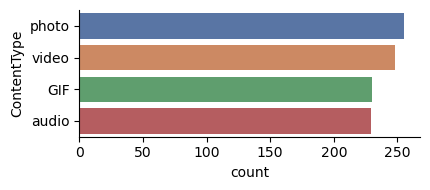

In [93]:
sns.catplot(y='ContentType', kind='count', data=df_no_duplicates, height=2.0, aspect=2.2, palette = 'deep')

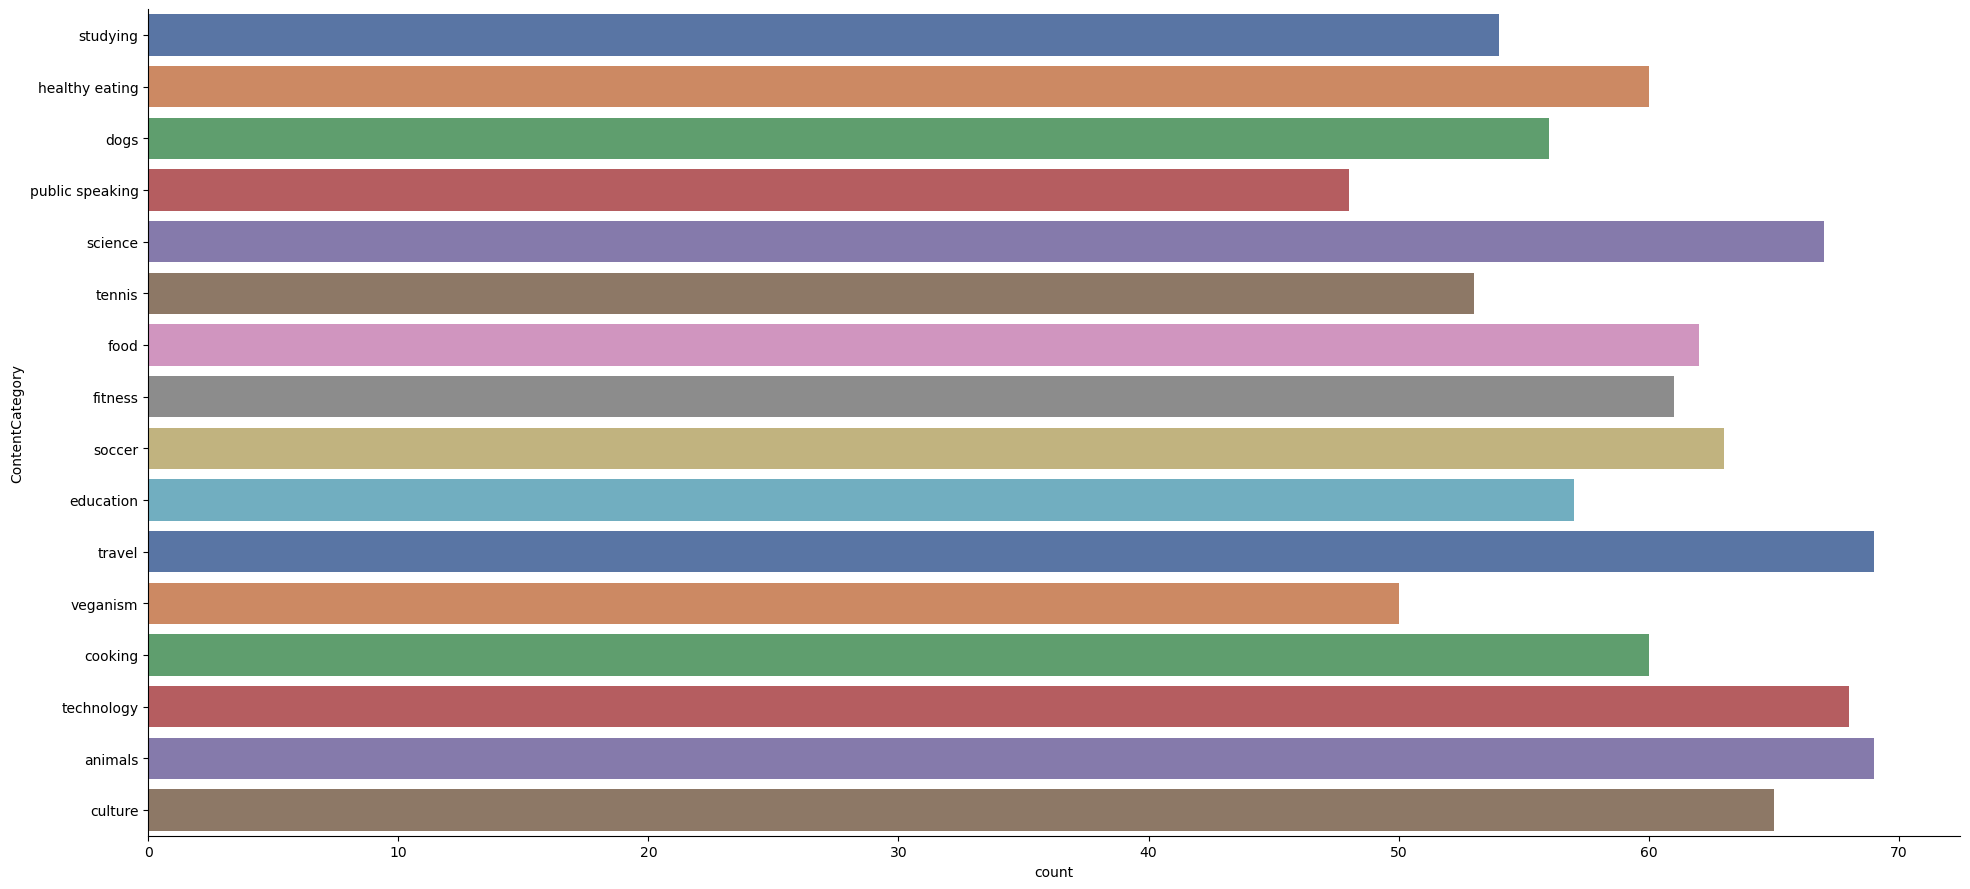

In [91]:
sns.catplot(y='ContentCategory', kind='count', data=df_no_duplicates, height=9.0, aspect=2.2, palette = 'deep')

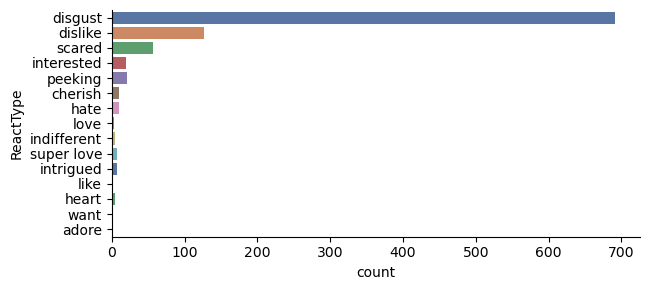

In [102]:
sns.catplot(y='ReactType', kind='count', data=df_no_duplicates, height=3.0, aspect=2.2, palette = 'deep')

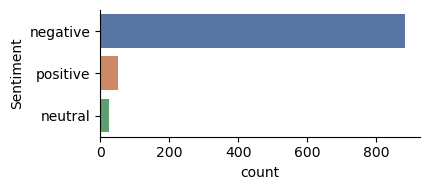

In [98]:
sns.catplot(y='Sentiment', kind='count', data=df_no_duplicates, height=2.0, aspect=2.2, palette = 'deep')

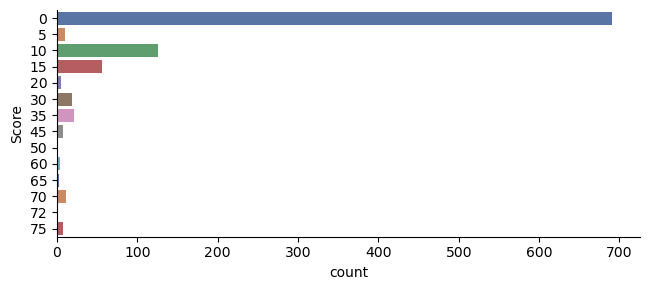

In [101]:
sns.catplot(y='Score', kind='count', data=df_no_duplicates, height=3.0, aspect=2.2, palette = 'deep')

In [103]:
dfall = df_no_duplicates.copy()

In [104]:
dfall.head()

,Content ID,ContentType,ContentCategory,ReactType,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0
5,3f8590c7-6ab2-4973-805a-90cdec355f05,video,dogs,disgust,2021-01-14 07:21:32,negative,0
8,b18cb63f-4c8e-44ee-a47f-541e95191d11,photo,public speaking,disgust,2021-05-27 01:44:22,negative,0


In [105]:
dfall.describe(include=["object"])

,Content ID,ContentType,ContentCategory,ReactType,Datetime,Sentiment
count,962,962,962,962,962,962
unique,962,4,16,15,962,3
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,travel,disgust,2020-11-07 09:43:50,negative
freq,1,255,69,691,1,883


In [109]:
# Mengurutkan DataFrame berdasarkan kolom "Performa" secara menurun (descending)
df_sorted = dfall.sort_values(by='Score', ascending=False)

# Mengambil 5 kategori performa terbaik
top_5_categories = df_sorted.head(5)

In [110]:
top_5_categories

,Content ID,ContentType,ContentCategory,ReactType,Datetime,Sentiment,Score
14650,52995b7c-6f2d-469c-a331-596323e6ad67,audio,science,super love,2021-01-10 15:02:47,positive,75
15191,f43114af-edb4-4629-bc15-7a483cf3eaf4,photo,technology,super love,2020-10-12 01:03:00,positive,75
13860,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,video,technology,super love,2021-02-05 17:00:19,positive,75
14463,f7c26d94-b7c6-45a0-b882-354d8d89c2af,photo,science,super love,2021-03-07 21:13:33,positive,75
14567,ae909545-786e-4089-9ef3-61c3c9fd3efd,video,education,super love,2020-11-04 03:53:29,positive,75


In [111]:
# Menyimpan DataFrame ke dalam file CSV dengan nama 'data.csv'
dfall.to_csv('dataclean.csv', index=False)

print("File CSV berhasil dibuat!")

File CSV berhasil dibuat!


In [112]:
# Menyimpan DataFrame ke dalam file CSV dengan nama 'data.csv'
top_5_categories.to_csv('top_5_categories.csv', index=False)
print("File CSV berhasil dibuat!")

File CSV berhasil dibuat!
